# Featurization Model selection

In [0]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Q1 Import libraries and read the dataset.

In [3]:
# Reading the csv file.
flat_df = pd.read_csv('/content/drive/My Drive/AIML/5thResidency/kc_house_data1.csv')
flat_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Q2 Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [4]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
id               999 non-null int64
date             999 non-null object
price            999 non-null float64
bedrooms         999 non-null int64
bathrooms        999 non-null float64
sqft_living      999 non-null int64
sqft_lot         999 non-null int64
floors           999 non-null float64
waterfront       999 non-null int64
view             999 non-null int64
condition        999 non-null int64
grade            999 non-null int64
sqft_above       999 non-null int64
sqft_basement    999 non-null int64
yr_built         999 non-null int64
yr_renovated     999 non-null int64
zipcode          999 non-null int64
lat              999 non-null float64
long             999 non-null float64
sqft_living15    999 non-null int64
sqft_lot15       999 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 164.0+ KB


In [0]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
# drop the columns id, date, zipcode
flat_df = flat_df.drop(['id','date','zipcode'],axis=1)


In [7]:
#see the disctibution
import seaborn as sns
sns.pairplot(flat_df,diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# find the correlation between the independent variable(prices) to the other variables
cor = flat_df.corr()
cor_target = abs(cor["price"])

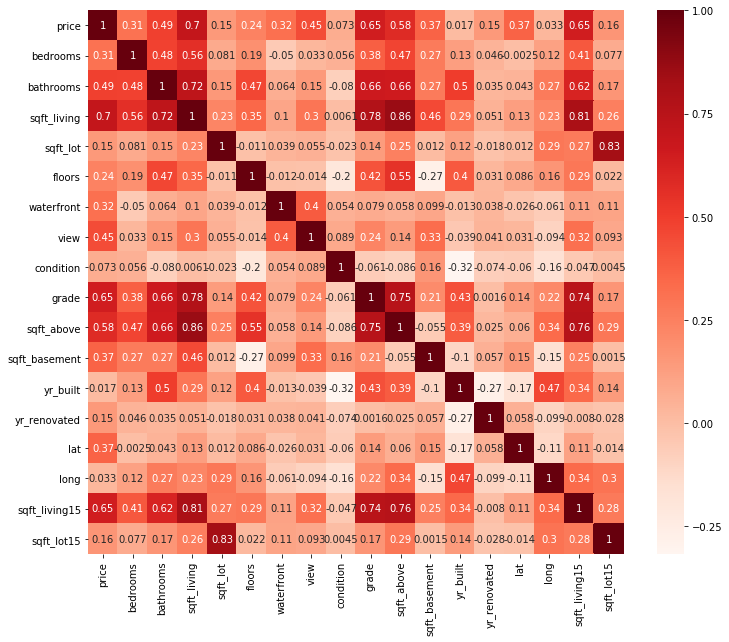

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Q3 State your insights.

### The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. We can observe that the correlation between price and grade is highest i.e. 0.67 and then between price and sqft_above i.e. 0.61. Also it indicates that most important fetaures are bedrooms, bathrooms, sqft_living, grade and yr_built to estimate the house price. 

# Q4. Build a linear regression model to predict the house prices

In [10]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features 

price            1.000000
bedrooms         0.306886
bathrooms        0.487360
sqft_living      0.704948
waterfront       0.317311
view             0.445190
grade            0.647845
sqft_above       0.582805
sqft_basement    0.367061
lat              0.365141
sqft_living15    0.645747
Name: price, dtype: float64

In [0]:
X =  flat_df[["bedrooms","bathrooms","sqft_living","view","grade","sqft_above","sqft_basement","lat","sqft_living15"]]
y =  flat_df[["price"]]
y= y.rename(columns={'price':'Class'})
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=1)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred=model.predict(Xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

Class    178433.297297
dtype: float64

In [14]:
model.score(Xtest,ytest)

0.6705431619068615

# Q5: Remove any unwanted columns or outliers, standardize variables in this pre-processing step

### The 'id','date' and 'zipcode' columns are already removed in the above step 8, since they are not adding any value for our house price prediction.


# Q6 Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

In [15]:
#2. Considering all the features
X =  flat_df.drop(["price"],axis=1)
y['Class'] =  flat_df[["price"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=1)
model.fit(Xtrain,ytrain)
y_pred=model.predict(Xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

Class    162952.493616
dtype: float64

In [16]:
model.score(Xtest,ytest)

0.725230359440465

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
#3. decisiontree classifier Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict=dt_model.predict(Xtest)

In [20]:
cr=metrics.classification_report(ytest,y_predict)
print(cr)

              precision    recall  f1-score   support

    130000.0       0.00      0.00      0.00         1
    165000.0       0.00      0.00      0.00         1
    166600.0       0.00      0.00      0.00         1
    166950.0       0.00      0.00      0.00         1
    171800.0       0.00      0.00      0.00         0
    178500.0       0.00      0.00      0.00         1
    180000.0       0.00      0.00      0.00         2
    186375.0       0.00      0.00      0.00         0
    188500.0       0.00      0.00      0.00         1
    190000.0       0.00      0.00      0.00         1
    195000.0       0.00      0.00      0.00         0
    196000.0       0.00      0.00      0.00         0
    196500.0       0.00      0.00      0.00         1
    199000.0       0.00      0.00      0.00         1
    200000.0       0.00      0.00      0.00         1
    201000.0       0.00      0.00      0.00         1
    205000.0       0.00      0.00      0.00         1
    205425.0       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [22]:
X_std.shape

(999, 17)

In [0]:
cov_matrix = np.cov(X_std.T)

In [24]:
cov_matrix.shape

(17, 17)

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


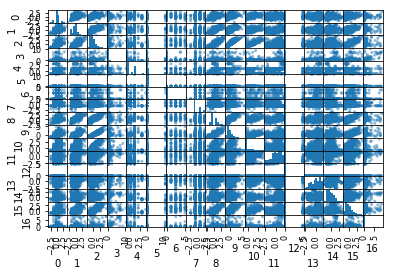

In [25]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [27]:
eig_vals.shape

(17,)

In [28]:
eig_vecs.shape

(17, 17)

In [29]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)


Eigen Vectors 
%s [[-2.42494880e-01  1.34476068e-01 -1.14831955e-01  3.14717500e-01
  -2.49142728e-01  2.41748663e-01  7.74341647e-02 -3.60258544e-01
  -4.00308112e-01  3.97864755e-01 -3.48767006e-01  2.79154994e-01
   1.44748277e-01  5.09807581e-02 -1.12965703e-01 -1.26853812e-02
  -3.10480675e-16]
 [-3.60318788e-01  1.89528439e-02 -1.38159674e-01  7.45720420e-03
  -7.32131958e-02  3.41492586e-02  1.01981504e-01 -1.47225272e-01
  -7.34179100e-02 -4.10270121e-01 -7.89144283e-02  3.72902137e-02
  -7.65136739e-01  6.19709328e-02 -4.80160892e-02 -1.97877801e-01
   3.73357959e-16]
 [-3.99595910e-01  1.90591673e-01 -3.62160426e-02  8.84172090e-02
  -4.32723207e-02  4.11290286e-03  1.02312742e-02  1.55902789e-02
   4.64690312e-02  6.29670950e-02  1.39555454e-01 -2.68222713e-01
   7.86784739e-02 -1.82993540e-01  4.02953393e-01  7.15859478e-02
   6.98509324e-01]
 [-1.53134786e-01 -1.24068834e-01  6.11774011e-01  1.74179121e-01
   1.12606068e-01 -2.50152085e-02 -1.44243914e-02 -1.99819027e-01
 

In [0]:

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [31]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.64718585  43.14188048  53.7715896   61.15160538  68.24959192
  74.09935883  79.58057883  83.53041231  87.16948836  90.48894798
  93.3379097   95.29060475  96.75418163  97.93786692  99.07923983
 100.         100.        ]


In [32]:
eigenvalues = eig_vals
eigenvectors = eig_vecs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  #


[(5.215242056379598, array([-0.24249488, -0.36031879, -0.39959591, -0.15313479, -0.22380929,
       -0.04861951, -0.11563991,  0.05001133, -0.37086491, -0.39107859,
       -0.10165058, -0.23330579,  0.00288255, -0.03886718, -0.18349479,
       -0.37695807, -0.16545968])), (2.126226442689091, array([ 0.13447607,  0.01895284,  0.19059167, -0.12406883, -0.24045212,
        0.22527095,  0.3749262 ,  0.29559506,  0.06267141, -0.06648215,
        0.49191298, -0.36858056,  0.16709121,  0.17133634, -0.35626808,
        0.09371137, -0.11902277])), (1.808861222778521, array([-0.11483196, -0.13815967, -0.03621604,  0.61177401, -0.29514274,
        0.16120144,  0.1302898 ,  0.13114735, -0.12791668, -0.06860606,
        0.04890712, -0.0950757 , -0.05173105, -0.07618751,  0.16192368,
        0.0295527 ,  0.6138422 ])), (1.2558597990598337, array([ 0.3147175 ,  0.0074572 ,  0.08841721,  0.17417912, -0.07595359,
       -0.61487123, -0.47417326,  0.10206711, -0.03455832,  0.04166365,
        0.10112954

In [33]:
tot = sum(eig_vals)
var_explained = [(i / tot) for i in sorted(eig_vals, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100
cum_var_exp

array([0.30647186, 0.4314188 , 0.5377159 , 0.61151605, 0.68249592,
       0.74099359, 0.79580579, 0.83530412, 0.87169488, 0.90488948,
       0.9333791 , 0.95290605, 0.96754182, 0.97937867, 0.9907924 ,
       1.        , 1.        ])

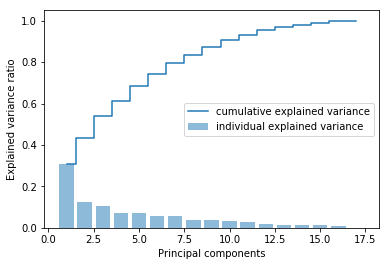

In [34]:

import matplotlib.pyplot as plt 
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=1)
xtrain

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
730,3,1.75,1970,7972,1.0,0,3,5,8,1370,600,1976,0,47.4908,-122.225,2460,9796
669,4,3.25,3160,5000,2.0,0,0,5,9,2360,800,1965,0,47.6597,-122.274,2220,4000
639,3,1.50,3000,5750,2.0,0,0,5,9,2000,1000,1924,0,47.5821,-122.390,1820,5750
803,5,2.50,2990,15085,2.0,0,0,3,9,2990,0,2007,0,47.7460,-122.218,3150,13076
736,3,1.00,1910,8167,1.0,0,0,4,8,1270,640,1951,0,47.7004,-122.368,1500,6816
329,3,2.25,2370,10289,1.0,0,0,4,9,1590,780,1977,0,47.5920,-122.166,2500,10004
844,4,3.50,2000,2309,3.0,0,0,3,8,2000,0,2008,0,47.7027,-122.361,1440,1548
134,4,3.50,2140,2278,3.0,0,0,3,9,2140,0,2005,0,47.6734,-122.380,1540,2285
688,3,1.00,1220,8329,1.0,0,0,3,6,1220,0,1946,0,47.6982,-122.298,1490,8322
763,4,2.75,2730,4683,2.0,0,0,3,7,2730,0,2005,0,47.3608,-122.043,2230,4924


In [36]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy' )
dt_model2.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict2=dt_model2.predict(xtest)

In [38]:
acc2=metrics.accuracy_score(ytest,y_predict2)
acc2

0.01

Note: The original input file is containing 21614 records and when I am trying to run this notebook with the below techniques, the notebook was running more than 4 hours and not producing any results, may be my laptop configuration issue. Hence I have modified the input file to 1000 records and using the same file for below techniques.

In [0]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A c

LR: 0.004000 (0.004899)
KNN: 0.005000 (0.006708)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when

CART: 0.007030 (0.010119)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

NB: 0.005000 (0.006708)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

SVM: 0.016020 (0.011143)


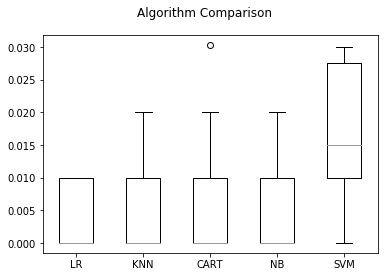

In [40]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A c

LR: 0.010010 (0.006325)
KNN: 0.006000 (0.006633)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when

CART: 0.001000 (0.003000)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

NB: 0.002000 (0.004000)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

SVM: 0.013010 (0.008997)


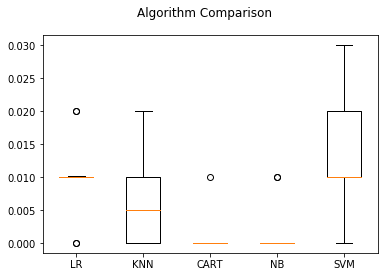

In [41]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, Proj_data_df, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:

LR=LogisticRegression()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, decomposition

In [43]:
#Declare data preprocessing steps
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', LR)])

pca.fit(X) 


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
n_components = [8,10,12]
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components))
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
estimator.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
               

In [45]:
estimator.best_params_

{'pca__n_components': 8}

In [46]:
estimator.best_score_

0.01001001001001001